In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 파일 불러오기

df_train = pd.read_csv('D:/data/train.csv')

In [3]:
# 불러온 데이터 확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 결측치 확인
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 'Embarked' 열에서 결측치가 있는 행 삭제. df_cleaned 생성
df_cleaned = df_train.dropna(subset=['Embarked'])

In [6]:
# 결측치 재확인
df_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
# Embarked와 Pclass의 빈도수 집계
embarked_pclass_counts = df_cleaned.groupby(['Embarked', 'Pclass']).size().unstack()

C:\Users\04-04\AppData\Local\Temp\ipykernel_10888\2270335128.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Embarked_temp'] = df_cleaned['Embarked'].map(embarked_map)


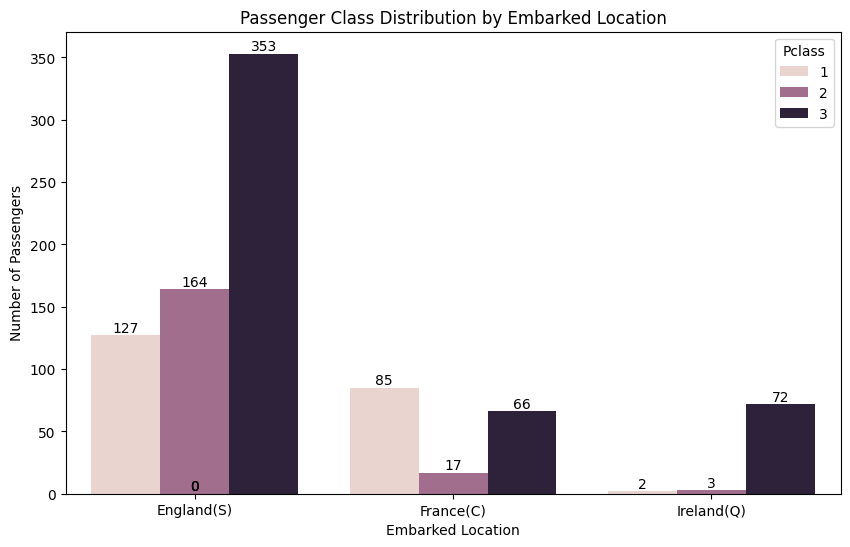

In [8]:
# 값 치환을 위한 딕셔너리 정의
embarked_map = {
    'C': 'France(C)',
    'Q': 'Ireland(Q)',
    'S': 'England(S)'
}

# 임시로 치환된 값을 생성
df_cleaned['Embarked_temp'] = df_cleaned['Embarked'].map(embarked_map)

# 그래프 생성
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned, x='Embarked_temp', hue='Pclass')

# 각 막대 위에 수치 추가
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,  # x 좌표: 막대의 중앙
        height,  # y 좌표: 막대의 높이
        f'{int(height)}',  # 표시할 텍스트
        ha='center',  # 텍스트 정렬
        va='bottom',  # 텍스트 위치
        fontsize=10,  # 텍스트 크기
        color='black'  # 텍스트 색상
    )

plt.title('Passenger Class Distribution by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass')
plt.show()

C:\Users\04-04\AppData\Local\Temp\ipykernel_10888\2303393649.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=grouped, x='Embarked_temp', y='death_rate', palette='viridis')


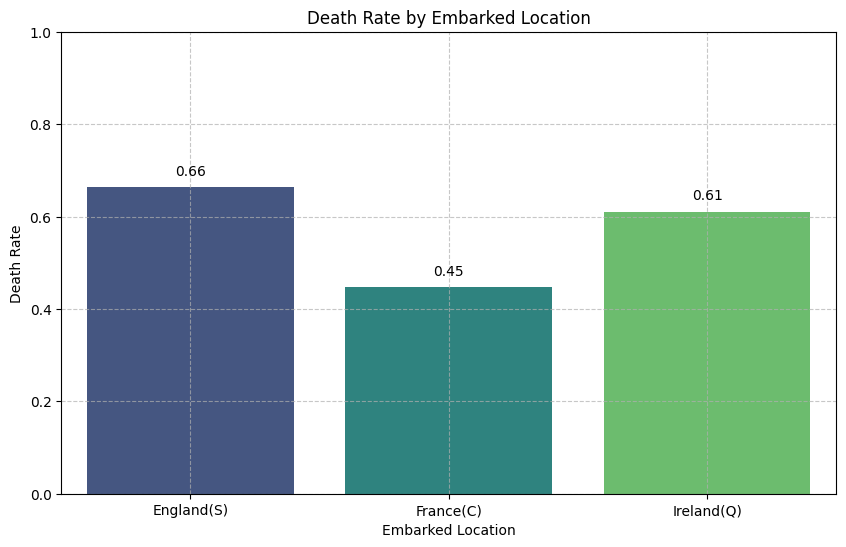

In [9]:
# 사망자 수와 총 탑승자 수를 계산
grouped = df_cleaned.groupby('Embarked_temp').agg(
    total_passengers=('PassengerId', 'size'),
    deaths=('Survived', lambda x: (x == 0).sum())  # Survived가 0인 승객 수
).reset_index()

# 사망률 계산
grouped['death_rate'] = grouped['deaths'] / grouped['total_passengers']

# 그래프 생성
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped, x='Embarked_temp', y='death_rate', palette='viridis')

# 각 막대 위에 수치 추가
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x 좌표: 막대의 중앙
        height + 0.02,  # y 좌표: 막대의 높이 + 약간의 오프셋
        f'{height:.2f}',  # 표시할 텍스트
        ha='center',  # 텍스트 정렬
        va='bottom',  # 텍스트 위치
        fontsize=10,  # 텍스트 크기
        color='black'  # 텍스트 색상
    )

plt.title('Death Rate by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Death Rate')
plt.ylim(0, 1)  # 사망률 범위 설정
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


C:\Users\04-04\AppData\Local\Temp\ipykernel_10888\451364867.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=death_counts, x='Embarked Location', y='Number of Deaths', palette='viridis')


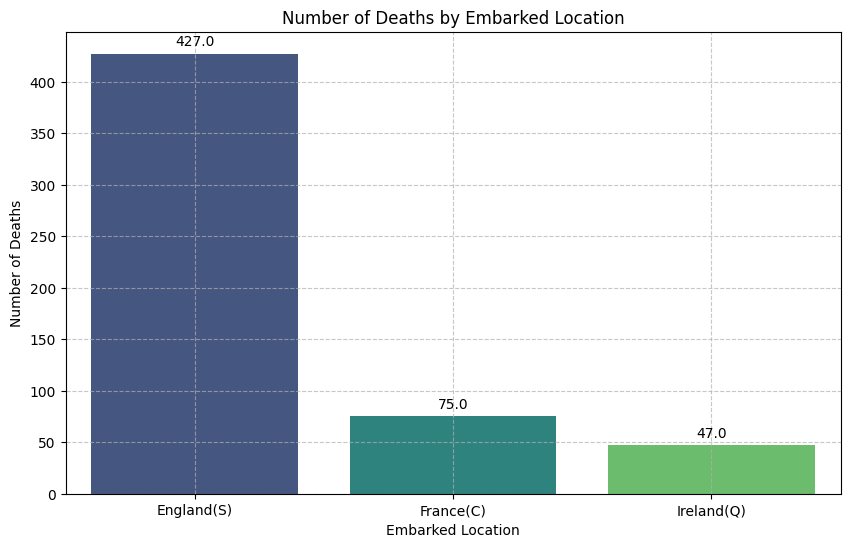

In [14]:
# 사망자 수를 계산
death_counts = df_cleaned.groupby('Embarked_temp')['Survived'].apply(lambda x: (x == 0).sum()).reset_index()
death_counts.columns = ['Embarked Location', 'Number of Deaths']

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=death_counts, x='Embarked Location', y='Number of Deaths', palette='viridis')

# 각 막대 위에 사망자 수 추가
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x 좌표: 막대의 중앙
        height + 5,  # y 좌표: 막대의 높이 + 약간의 오프셋
        f'{height}',  # 표시할 텍스트
        ha='center',  # 텍스트 정렬
        va='bottom',  # 텍스트 위치
        fontsize=10,  # 텍스트 크기
        color='black'  # 텍스트 색상
    )

plt.title('Number of Deaths by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Number of Deaths')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


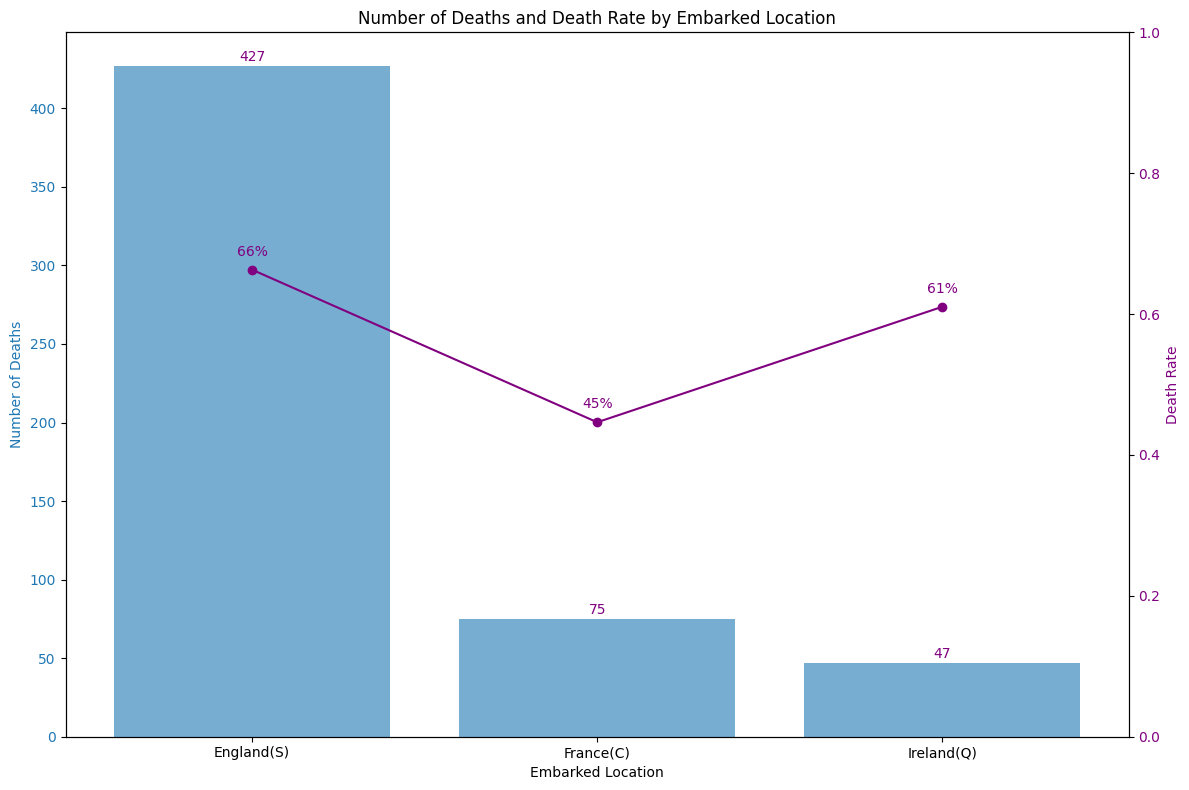

In [15]:
# 사망자 수와 총 탑승자 수를 계산
grouped = df_cleaned.groupby('Embarked_temp').agg(
    total_passengers=('PassengerId', 'size'),
    deaths=('Survived', lambda x: (x == 0).sum())  # Survived가 0인 승객 수 (사망자 수)
).reset_index()

# 사망률 계산
grouped['death_rate'] = grouped['deaths'] / grouped['total_passengers']

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 8))

# 막대 그래프: 사망자 수
color = 'tab:blue'
ax1.set_xlabel('Embarked Location')
ax1.set_ylabel('Number of Deaths', color=color)
ax1.bar(grouped['Embarked_temp'], grouped['deaths'], color=color, alpha=0.6, label='Number of Deaths')
ax1.tick_params(axis='y', labelcolor=color)

# 선 그래프: 사망률
ax2 = ax1.twinx()  # 이 축은 ax1과 공유됩니다.
color = '#800080'
ax2.set_ylabel('Death Rate', color=color)
line_plot = ax2.plot(grouped['Embarked_temp'], grouped['death_rate'], color=color, marker='o', label='Death Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1)  # 사망률 범위 설정: 0에서 1까지

# 각 막대 위에 사망자 수 추가
for i in range(len(grouped['Embarked_temp'])):
    ax1.text(
        grouped['Embarked_temp'].iloc[i], 
        grouped['deaths'].iloc[i] + 1, 
        f'{grouped['deaths'].iloc[i]}',
        ha='center',
        va='bottom',
        fontsize=10,
        color=color
    )

# 각 선 그래프 포인트 위에 사망률 추가
for x, y in zip(grouped['Embarked_temp'], grouped['death_rate']):
    ax2.annotate(
        f'{y*100:.0f}%',  # 표시할 텍스트 (백분율)
        (x, y),  # 텍스트 위치
        textcoords="offset points",
        xytext=(0,10),  # 텍스트 위치 오프셋
        ha='center',
        fontsize=10,
        color=color
    )

# 그래프 제목 및 레이블 설정
plt.title('Number of Deaths and Death Rate by Embarked Location')
fig.tight_layout()  # 자동 레이아웃 조정
plt.show()


C:\Users\04-04\AppData\Local\Temp\ipykernel_10888\3924741692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Survived_temp'] = df_cleaned['Survived'].map({0: 'Not Survived', 1: 'Survived'})


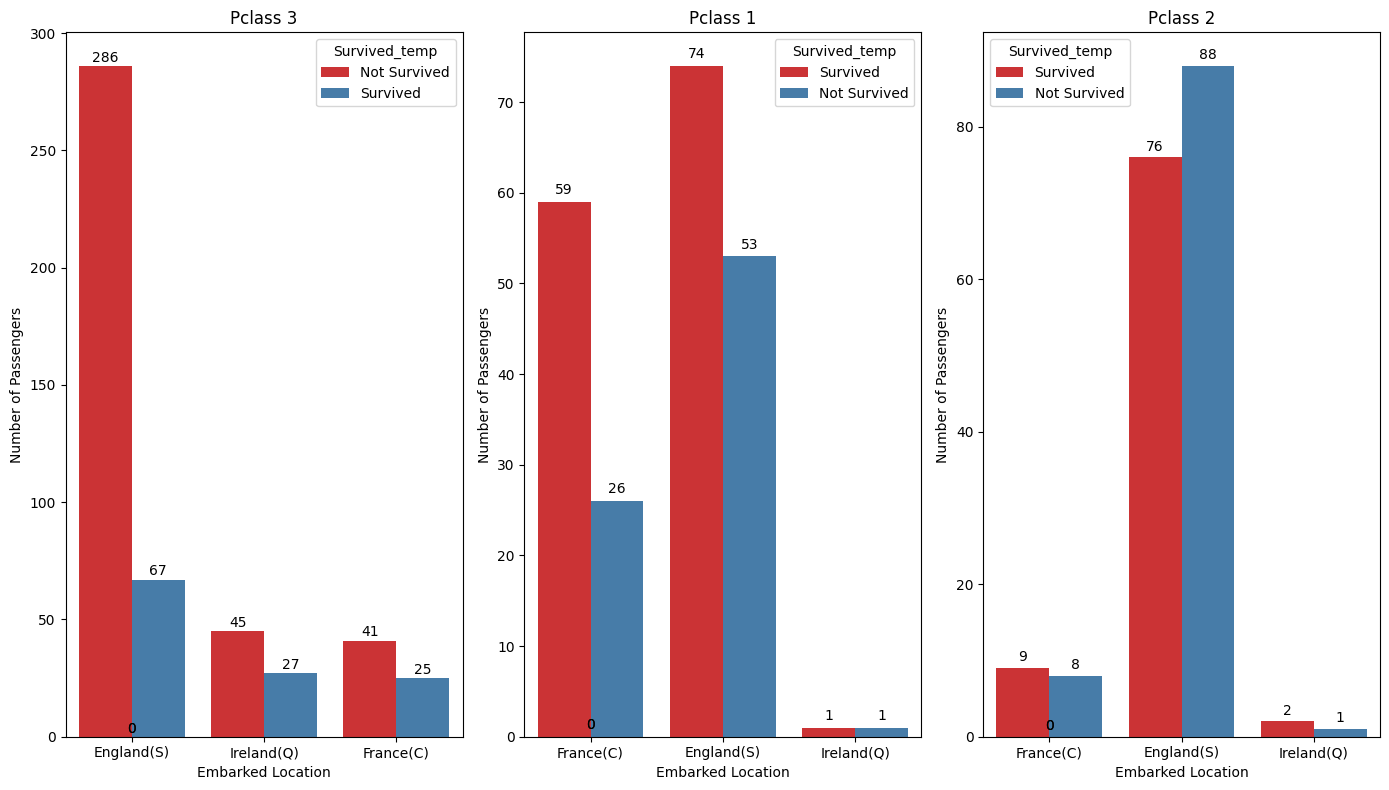

In [16]:
# Survived 열을 'Survived'와 'Not Survived'로 변환
df_cleaned['Survived_temp'] = df_cleaned['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# 그래프 생성
plt.figure(figsize=(14, 8))

# 승객 등급별 서브플롯 생성
for i, pclass in enumerate(df_cleaned['Pclass'].unique(), start=1):
    plt.subplot(1, 3, i)  # 1행 3열의 서브플롯
    subset = df_cleaned[df_cleaned['Pclass'] == pclass]
    ax = sns.countplot(data=subset, x='Embarked_temp', hue='Survived_temp', palette='Set1')

    # 각 막대 위에 수치 추가
    for patch in ax.patches:
        height = patch.get_height()
        ax.text(
            patch.get_x() + patch.get_width() / 2,  # x 좌표: 막대의 중앙
            height + 0.5,  # y 좌표: 막대의 높이 + 약간의 오프셋
            f'{int(height)}',  # 표시할 텍스트
            ha='center',  # 텍스트 정렬
            va='bottom',  # 텍스트 위치
            fontsize=10,  # 텍스트 크기
            color='black'  # 텍스트 색상
        )
    
    plt.title(f'Pclass {pclass}')
    plt.xlabel('Embarked Location')
    plt.ylabel('Number of Passengers')

plt.tight_layout()
plt.show()


In [13]:
# 장소별 탑승자 수를 보면 England가 217명, France가 93명, Ireland가 30명 입니다.
# 각 장소별 사망율은 66%, 45%, 61%를 보이고 있습니다.
# 사망율로 보았을 때는 탑승장소 즉, 생활권이 사망율과 직접적 상관관계가 있다고 보기 어렵습니다. 
# 오히려 객실 등급이 사망률에 미치는 영향이 더 큰 것으로 추정됩니다.